In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from matplotlib.pyplot import figure
import seaborn as sns


In [2]:
data=pd.read_csv('/Users/mac/Downloads/ds_salaries.csv')

In [3]:
data.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:

Location_US= data["company_location"]=="US"
data["Location"]=Location_US
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Location
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,False
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,False
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,False
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,False
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,True
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,True
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,True
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,True


In [5]:
data.corr()  # prints the correlation coefficient between every pair of attributes


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio,Location
Unnamed: 0,1.000000,0.886550,-0.096250,0.167025,0.095000,0.236216
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314,0.252017
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608,-0.104826
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122,0.531643
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000,0.199119
Location,0.236216,0.252017,-0.104826,0.531643,0.199119,1.000000


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
data['experience_level']=le.fit_transform(data['experience_level'])
data['employment_type']=le.fit_transform(data['employment_type'])
data['job_title']=le.fit_transform(data['job_title'])
data['salary_currency']=le.fit_transform(data['salary_currency'])
data['employee_residence']=le.fit_transform(data['employee_residence'])
data['company_location']=le.fit_transform(data['company_location'])
data['company_size']=le.fit_transform(data['company_size'])
data['Location']=le.fit_transform(data['Location'])

In [8]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Location
0,0,2020,2,2,22,70000,7,79833,14,0,12,0,0
1,1,2020,3,2,41,260000,16,260000,32,0,29,2,0
2,2,2020,3,2,7,85000,8,109024,20,50,18,1,0
3,3,2020,2,2,47,20000,16,20000,23,0,20,2,0
4,4,2020,3,2,38,150000,16,150000,55,50,48,0,1


In [9]:
data.drop(columns=data.columns[0],axis=1,inplace=True)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Location
0,2020,2,2,22,70000,7,79833,14,0,12,0,0
1,2020,3,2,41,260000,16,260000,32,0,29,2,0
2,2020,3,2,7,85000,8,109024,20,50,18,1,0
3,2020,2,2,47,20000,16,20000,23,0,20,2,0
4,2020,3,2,38,150000,16,150000,55,50,48,0,1


In [10]:
corr_matrix=data.corr()  # prints the correlation coefficient between every pair of attributes
corr_matrix

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Location
work_year,1.000000,0.300632,0.016323,-0.162560,-0.087577,0.202420,0.170493,0.193552,0.076314,0.181515,0.078764,0.252017
experience_level,0.300632,1.000000,-0.043715,0.020192,-0.023811,0.199998,0.315312,0.226543,0.053628,0.247133,-0.066423,0.305415
employment_type,0.016323,-0.043715,1.000000,-0.101823,0.000536,-0.087365,-0.123545,-0.109979,-0.045592,-0.083661,0.034549,-0.094129
job_title,-0.162560,0.020192,-0.101823,1.000000,0.027710,-0.149591,0.131016,-0.119135,-0.058589,-0.147379,-0.031011,-0.167988
salary,-0.087577,-0.023811,0.000536,0.027710,1.000000,-0.120725,-0.083906,-0.105638,-0.014608,-0.082894,-0.079959,-0.104826
salary_currency,0.202420,0.199998,-0.087365,-0.149591,-0.120725,1.000000,0.420550,0.758730,0.149746,0.787084,0.038849,0.762364
salary_in_usd,0.170493,0.315312,-0.123545,0.131016,-0.083906,0.420550,1.000000,0.452501,0.132122,0.428994,-0.151205,0.531643
employee_residence,0.193552,0.226543,-0.109979,-0.119135,-0.105638,0.758730,0.452501,1.000000,0.157299,0.897704,-0.081742,0.823085
remote_ratio,0.076314,0.053628,-0.045592,-0.058589,-0.014608,0.149746,0.132122,0.157299,1.000000,0.169083,0.022070,0.199119
company_location,0.181515,0.247133,-0.083661,-0.147379,-0.082894,0.787084,0.428994,0.897704,0.169083,1.000000,-0.066554,0.897439


In [11]:
corr_matrix=data.corr()  # prints the correlation coefficient between every pair of attributes
corr_matrix

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Location
work_year,1.000000,0.300632,0.016323,-0.162560,-0.087577,0.202420,0.170493,0.193552,0.076314,0.181515,0.078764,0.252017
experience_level,0.300632,1.000000,-0.043715,0.020192,-0.023811,0.199998,0.315312,0.226543,0.053628,0.247133,-0.066423,0.305415
employment_type,0.016323,-0.043715,1.000000,-0.101823,0.000536,-0.087365,-0.123545,-0.109979,-0.045592,-0.083661,0.034549,-0.094129
job_title,-0.162560,0.020192,-0.101823,1.000000,0.027710,-0.149591,0.131016,-0.119135,-0.058589,-0.147379,-0.031011,-0.167988
salary,-0.087577,-0.023811,0.000536,0.027710,1.000000,-0.120725,-0.083906,-0.105638,-0.014608,-0.082894,-0.079959,-0.104826
salary_currency,0.202420,0.199998,-0.087365,-0.149591,-0.120725,1.000000,0.420550,0.758730,0.149746,0.787084,0.038849,0.762364
salary_in_usd,0.170493,0.315312,-0.123545,0.131016,-0.083906,0.420550,1.000000,0.452501,0.132122,0.428994,-0.151205,0.531643
employee_residence,0.193552,0.226543,-0.109979,-0.119135,-0.105638,0.758730,0.452501,1.000000,0.157299,0.897704,-0.081742,0.823085
remote_ratio,0.076314,0.053628,-0.045592,-0.058589,-0.014608,0.149746,0.132122,0.157299,1.000000,0.169083,0.022070,0.199119
company_location,0.181515,0.247133,-0.083661,-0.147379,-0.082894,0.787084,0.428994,0.897704,0.169083,1.000000,-0.066554,0.897439


In [12]:

dataset1=data[["employee_residence","salary_currency","salary_in_usd","experience_level", "remote_ratio","company_size","salary","employment_type", "job_title"  ]]
dataset2=data[["employee_residence","salary_currency","salary_in_usd","experience_level", "remote_ratio"]]
dataset3=data[["employee_residence","salary_currency","salary_in_usd"]]

In [13]:
corr_matrix['job_title'].sort_values(ascending=False)


job_title             1.000000
salary_in_usd         0.131016
salary                0.027710
experience_level      0.020192
company_size         -0.031011
remote_ratio         -0.058589
employment_type      -0.101823
employee_residence   -0.119135
company_location     -0.147379
salary_currency      -0.149591
work_year            -0.162560
Location             -0.167988
Name: job_title, dtype: float64

In [14]:
corr_matrix['employment_type'].sort_values(ascending=False)


employment_type       1.000000
company_size          0.034549
work_year             0.016323
salary                0.000536
experience_level     -0.043715
remote_ratio         -0.045592
company_location     -0.083661
salary_currency      -0.087365
Location             -0.094129
job_title            -0.101823
employee_residence   -0.109979
salary_in_usd        -0.123545
Name: employment_type, dtype: float64

In [15]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Location
0,2020,2,2,22,70000,7,79833,14,0,12,0,0
1,2020,3,2,41,260000,16,260000,32,0,29,2,0
2,2020,3,2,7,85000,8,109024,20,50,18,1,0
3,2020,2,2,47,20000,16,20000,23,0,20,2,0
4,2020,3,2,38,150000,16,150000,55,50,48,0,1


In [16]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 

In [17]:
dataset = data['salary']
len(dataset)

607

In [18]:
dataset.isnull().sum()


0

(array([[607.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [607.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [607.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        

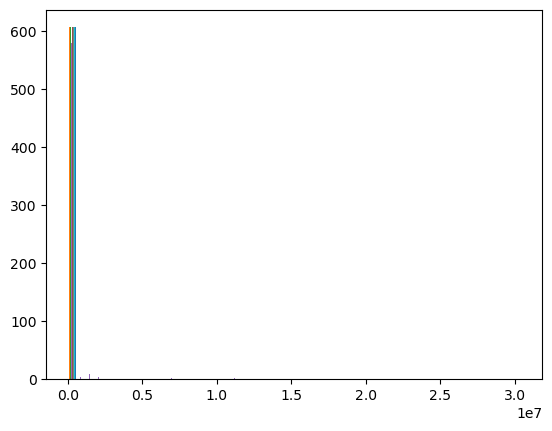

In [19]:
plt.hist(data, bins=50)


<AxesSubplot:xlabel='salary', ylabel='Density'>

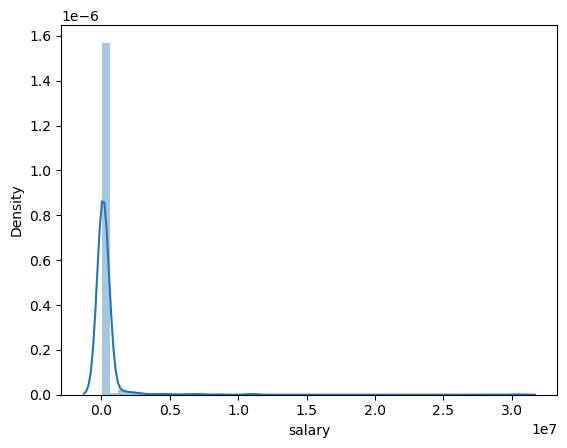

In [20]:
sns.distplot(dataset)

<AxesSubplot:ylabel='Density'>

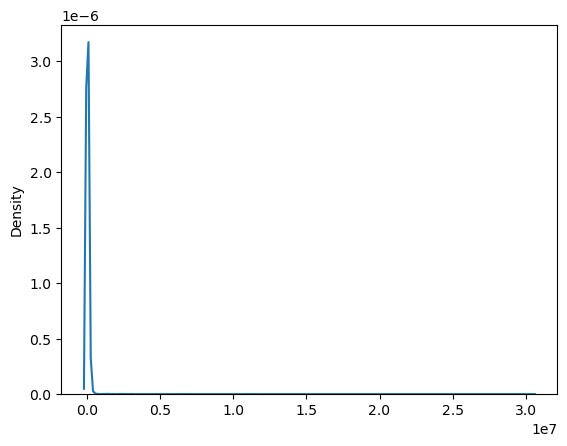

In [21]:
sns.distplot(data, hist=False) # adding an argument to plot only frequency polygon


<AxesSubplot:xlabel='salary'>

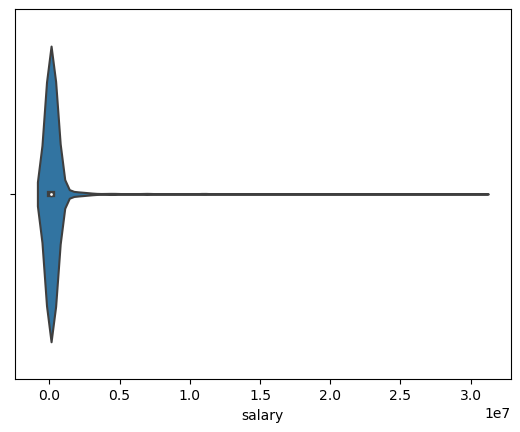

In [22]:
sns.violinplot(dataset)

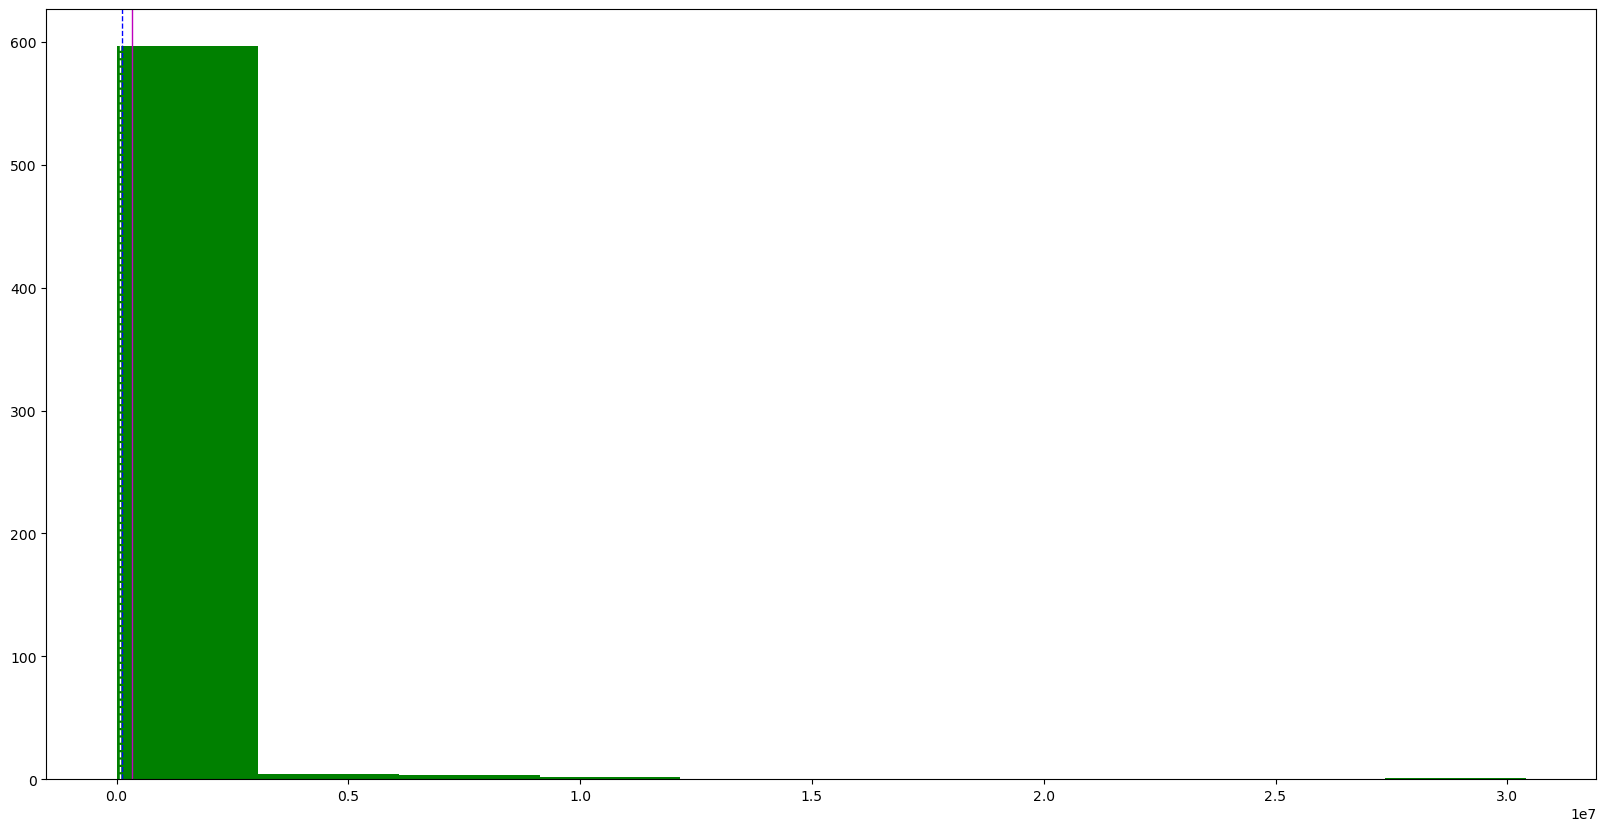

In [23]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(dataset, color='g') # plots a simple histogram
plt.axvline(dataset.mean(), color='m', linewidth=1)
plt.axvline(dataset.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(dataset.mode()[0], color='w', linestyle='dashed', linewidth=1)

In [24]:
# If we notice univariate analysis does not properly work with less dataset

# # Spliting Data
# 



import sklearn
from sklearn.model_selection import train_test_split
y=data['Location']
#X = data1[data1.columns.difference(['company_location'])]
X=data[['employee_residence']] #'salary_currency'
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [25]:
# KNN Classifier


from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(y_pred)

[1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1
 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1
 0 1 0 0]


In [26]:
y_train31=(y_train==31)
y_train31
y_test31=(y_test==31)
y_pred31=(y_pred==31)

In [27]:
#accuracy
from sklearn import metrics
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

accuracy: 0.9539473684210527


In [28]:
# RANDOM FOREST CLASSIFIER

# In[42]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
forest_clf= RandomForestClassifier(max_depth=7,random_state=0)
forest_clf.fit(X_train,y_train)
res_pred=forest_clf.predict(X_train)
accuracy_score(y_train, res_pred)


0.9604395604395605

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [30]:
from sklearn.metrics import plot_confusion_matrix
clf=LogisticRegression()
clf.fit(X_train,y_train)
clf_pred=clf.predict(X_train)
accuracy_score(y_train, clf_pred)


0.9098901098901099

<AxesSubplot:>

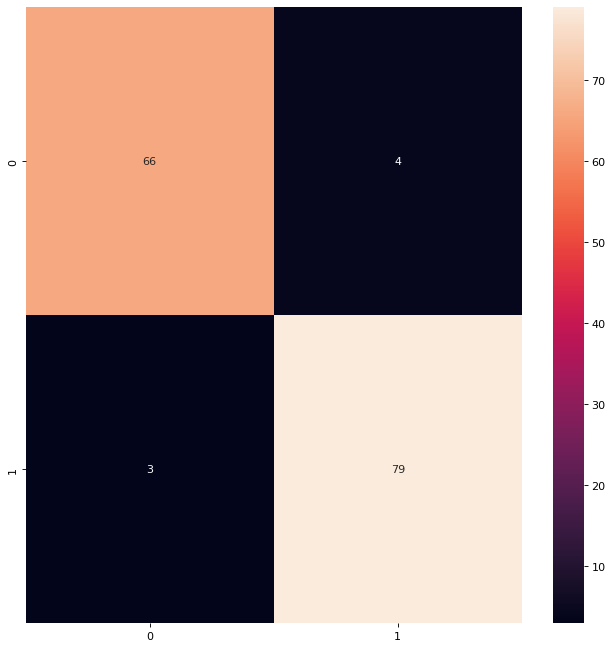

In [31]:
#confusion_matrix(y_pred,y_test)
figure(figsize=(10, 10), dpi=80)

#sns.heatmap(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [32]:
#ç
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        70
           1       0.95      0.96      0.96        82

    accuracy                           0.95       152
   macro avg       0.95      0.95      0.95       152
weighted avg       0.95      0.95      0.95       152



<AxesSubplot:>

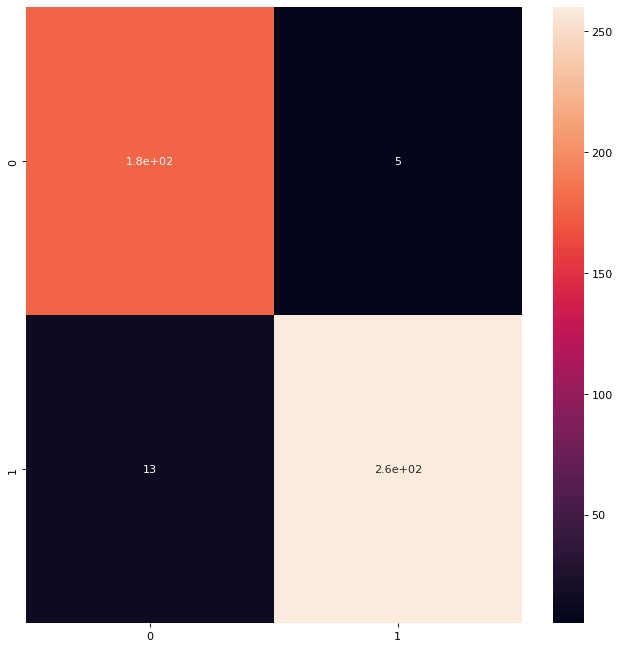

In [33]:
figure(figsize=(10, 10), dpi=80)
sns.heatmap(confusion_matrix(y_train,res_pred), annot=True)

In [34]:
print(classification_report(y_train,res_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       182
           1       0.98      0.95      0.97       273

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455



In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X_train,y_train,cv=3,scoring="accuracy")

array([0.90789474, 0.96052632, 0.9602649 ])

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

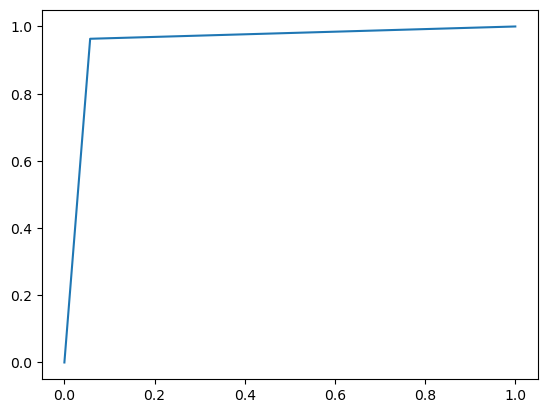

In [37]:
plt.plot(fpr,tpr )

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import label_binarize
import sklearn
from sklearn.model_selection import train_test_split
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score

In [40]:
df=pd.read_csv('/Users/mac/Downloads/ds_salaries.csv')

In [41]:
Location_US= df["company_location"]=="US"
df["Location"]=Location_US
df.drop(['company_location'], axis=1)
df.drop(columns=df.columns[0],axis=1,inplace=True)
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Location
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,False
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,False
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,False
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,False
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,True
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,True
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,True
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,True
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,True


In [42]:
 from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
df['work_year']=le.fit_transform(df['work_year'])
df['Location']=le.fit_transform(df['Location'])
df['employee_residence']=le.fit_transform(df['employee_residence'])
df['salary_currency']=le.fit_transform(df['salary_currency'])
df['employment_type']=le.fit_transform(df['employment_type'])
df['experience_level']=le.fit_transform(df['experience_level'])
df['job_title']=le.fit_transform(df['job_title'])
df['company_location']=le.fit_transform(df['company_location'])
df['company_size']=le.fit_transform(df['company_size'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           607 non-null    int64
 1   experience_level    607 non-null    int64
 2   employment_type     607 non-null    int64
 3   job_title           607 non-null    int64
 4   salary              607 non-null    int64
 5   salary_currency     607 non-null    int64
 6   salary_in_usd       607 non-null    int64
 7   employee_residence  607 non-null    int64
 8   remote_ratio        607 non-null    int64
 9   company_location    607 non-null    int64
 10  company_size        607 non-null    int64
 11  Location            607 non-null    int64
dtypes: int64(12)
memory usage: 57.0 KB


In [44]:

df1=df[["Location","employee_residence","salary_currency","salary_in_usd","experience_level", "remote_ratio","company_size","salary","employment_type", "job_title"  ]]
df2=df[["Location","employee_residence","salary_currency","salary_in_usd","experience_level", "remote_ratio"]]
df3=df[["Location","employee_residence","salary_currency","salary_in_usd"]]

In [45]:
X=df.drop(['Location'],axis=1)
Y=df['Location']

In [46]:
X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [47]:
clf= RandomForestClassifier(max_depth=7,random_state=0)
clf.fit(X_train,y_train)
res_pred=clf.predict(X_train)
accuracy_score(y_train, res_pred)

1.0

In [48]:
cross_val_score(clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.99295775, 1.        , 1.        ])

In [49]:

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print ("KNN ",accuracy_score(y_test,knn_pred))

KNN  0.8797814207650273


In [50]:
cross_val_score(knn,X_train,y_train,cv=3,scoring="accuracy")

array([0.84507042, 0.86524823, 0.87234043])

<AxesSubplot:>

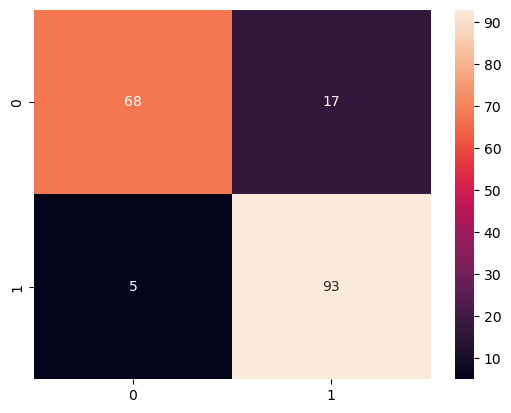

In [51]:
sns.heatmap(confusion_matrix(y_test,knn_pred), annot=True)

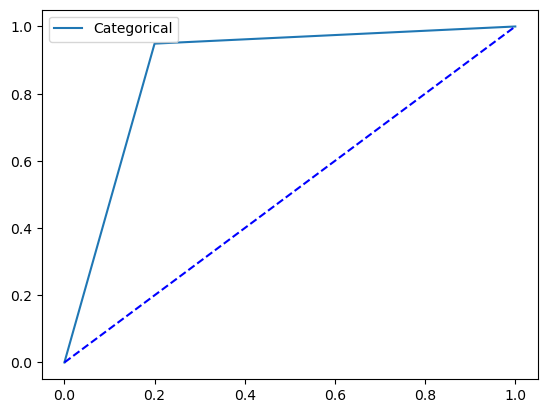

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Categorical' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()

In [53]:
cm = confusion_matrix(y_test, knn_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(knn_pred, y_test))
print('recall = ', recall_score(knn_pred, y_test))
auc = roc_auc_score(y_test, knn_pred)
print('AUC: %.3f' % auc)

tp fp tn fn
68 17 5 93
sensitivity = 0.422360248447205
specificity = 0.22727272727272727
precision = 0.9489795918367347
recall =  0.8454545454545455
AUC: 0.874


In [54]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
mnb_pred=mnb.predict(X_test)
print ("Multinomial ",accuracy_score(y_test,mnb_pred))

Multinomial  0.6229508196721312


<AxesSubplot:>

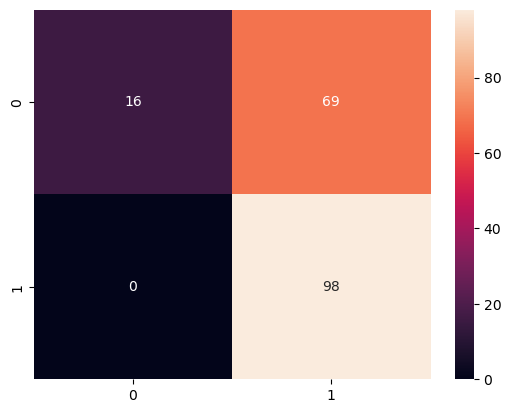

In [55]:
sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True)

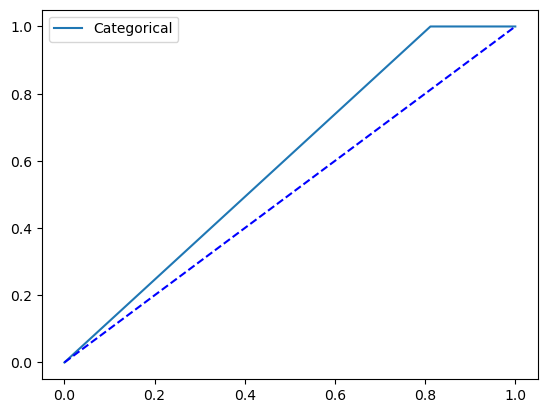

In [56]:
fpr, tpr, thresholds = roc_curve(y_test, mnb_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Categorical' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()

In [57]:
cross_val_score(gnb,X_train,y_train,cv=3,scoring="accuracy")

NameError: name 'gnb' is not defined

In [58]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
mnb_pred=mnb.predict(X_test)
print ("Multinomial ",accuracy_score(y_test,mnb_pred))

Multinomial  0.6229508196721312


In [59]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
mnb_pred=mnb.predict(X_test)
print ("Multinomial ",accuracy_score(y_test,mnb_pred))

Multinomial  0.6229508196721312


<AxesSubplot:>

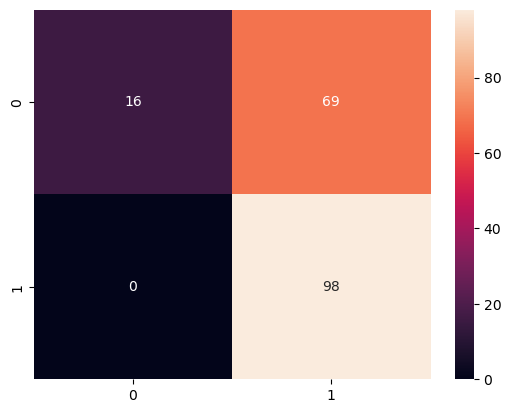

In [60]:
sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True)

In [61]:
cross_val_score(mnb,X_train,y_train,cv=3,scoring="accuracy")

array([0.64788732, 0.67375887, 0.65957447])

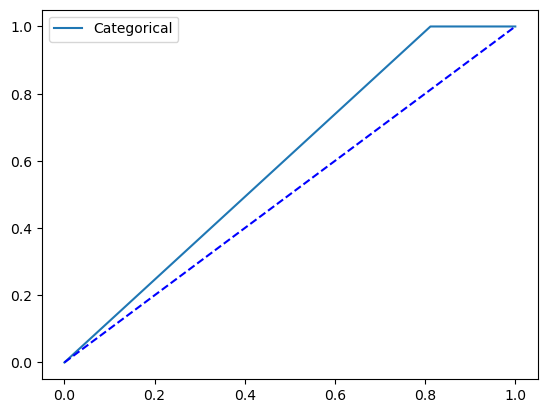

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, mnb_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Categorical' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()

In [63]:
cm = confusion_matrix(y_test, mnb_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(mnb_pred, y_test))
print('recall = ', recall_score(mnb_pred, y_test))
auc = roc_auc_score(y_test, mnb_pred)
print('AUC: %.3f' % auc)

tp fp tn fn
16 69 0 98
sensitivity = 0.14035087719298245
specificity = 0.0
precision = 1.0
recall =  0.5868263473053892
AUC: 0.594


In [64]:
gnb=GaussianNB()  
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print ("Guassian ",accuracy_score(y_test,gnb_pred))

Guassian  0.6502732240437158


<AxesSubplot:>

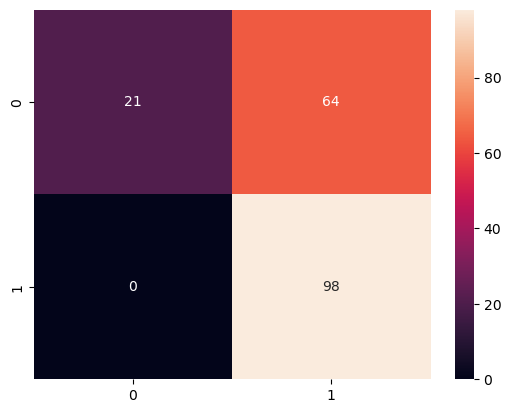

In [65]:
sns.heatmap(confusion_matrix(y_test,gnb_pred), annot=True)

In [66]:
cross_val_score(gnb,X_train,y_train,cv=3,scoring="accuracy")

array([0.63380282, 0.92198582, 0.66666667])

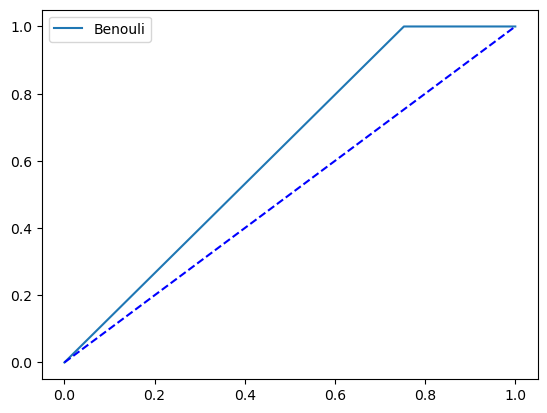

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, gnb_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Benouli' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()

In [68]:
cnb=ComplementNB()  
cnb.fit(X_train,y_train)
cnb_pred = cnb.predict(X_test)
print ("Complement ",accuracy_score(y_test,cnb_pred))

Complement  0.6229508196721312


<AxesSubplot:>

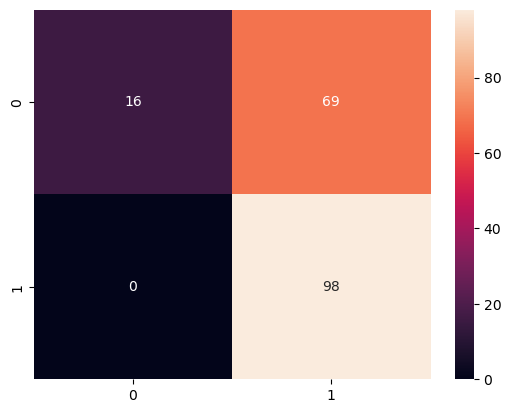

In [69]:
sns.heatmap(confusion_matrix(y_test,cnb_pred), annot=True)

In [70]:
cross_val_score(cnb,X_train,y_train,cv=3,scoring="accuracy")

array([0.64788732, 0.67375887, 0.65957447])

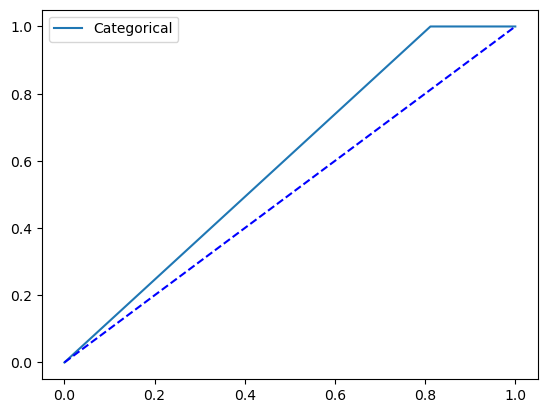

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, cnb_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Categorical' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()


In [72]:
cm = confusion_matrix(y_test, cnb_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(cnb_pred, y_test))
print('recall = ', recall_score(cnb_pred, y_test))
auc = roc_auc_score(y_test, cnb_pred)
print('AUC: %.3f' % auc)

tp fp tn fn
16 69 0 98
sensitivity = 0.14035087719298245
specificity = 0.0
precision = 1.0
recall =  0.5868263473053892
AUC: 0.594


In [73]:
bnb=BernoulliNB(binarize=True)  
bnb.fit(X_train,y_train)
bnb_pred = bnb.predict(X_test)
print ("Bernoulli ",accuracy_score(y_test,bnb_pred))

Bernoulli  0.6338797814207651


<AxesSubplot:>

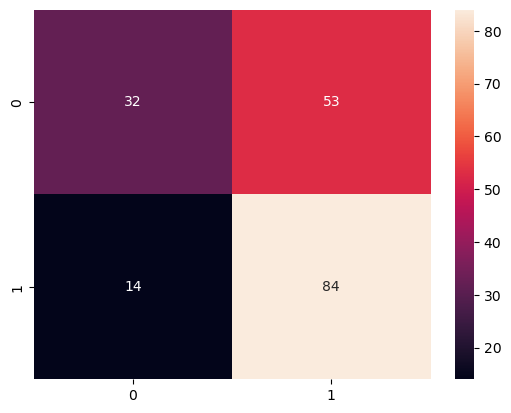

In [74]:
sns.heatmap(confusion_matrix(y_test,bnb_pred), annot=True)

In [75]:
cross_val_score(bnb,X_train,y_train,cv=3,scoring="accuracy")

array([0.66197183, 0.63829787, 0.60283688])

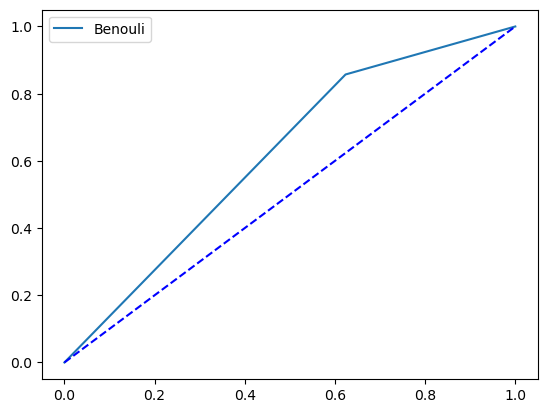

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, bnb_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Benouli' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()

In [77]:
cm = confusion_matrix(y_test, bnb_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(bnb_pred, y_test))
print('recall = ', recall_score(bnb_pred, y_test))
auc = roc_auc_score(y_test, bnb_pred)
print('AUC: %.3f' % auc)

tp fp tn fn
32 53 14 84
sensitivity = 0.27586206896551724
specificity = 0.208955223880597
precision = 0.8571428571428571
recall =  0.6131386861313869
AUC: 0.617


In [78]:
canb=CategoricalNB()  
canb.fit(X_train,y_train)
canb_pred = gnb.predict(X_test)
print ("Categorical ",accuracy_score(y_test,canb_pred))

Categorical  0.6502732240437158


In [79]:
cross_val_score(canb,X_train,y_train,cv=3,scoring="accuracy")

array([nan, nan, nan])

<AxesSubplot:>

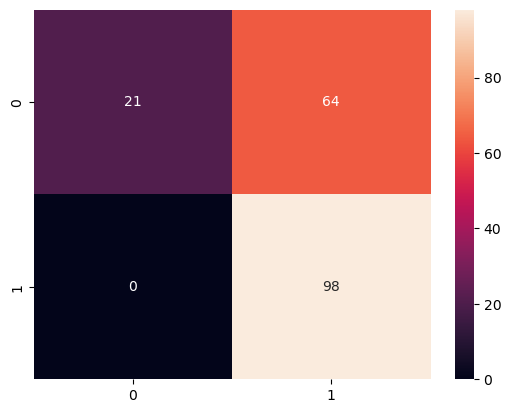

In [80]:
sns.heatmap(confusion_matrix(y_test,canb_pred), annot=True)

In [81]:
cross_val_score(canb,X_train,y_train,cv=3,scoring="accuracy")

array([nan, nan, nan])

In [82]:
cm = confusion_matrix(y_test, canb_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(canb_pred, y_test))
print('recall = ', recall_score(canb_pred, y_test))
auc = roc_auc_score(y_test, canb_pred)
print('AUC: %.3f' % auc)

tp fp tn fn
21 64 0 98
sensitivity = 0.17647058823529413
specificity = 0.0
precision = 1.0
recall =  0.6049382716049383
AUC: 0.624


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [84]:
df=pd.read_csv('/Users/mac/Downloads/ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [85]:
df.rename(columns={'Income composition of resources':'HDI'},inplace=True)
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [86]:
df=df[['HDI','Adult Mortality']]
df.dropna(inplace = True)
df.info()

KeyError: "None of [Index(['HDI', 'Adult Mortality'], dtype='object')] are in the [columns]"

In [87]:
plt.scatter(df['HDI'],df['Adult Mortality'])
plt.xlabel('HDI')
plt.ylabel('Adult Mortality')

KeyError: 'HDI'

In [88]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['HDI','Adult Mortality']])
y_predicted

KeyError: "None of [Index(['HDI', 'Adult Mortality'], dtype='object')] are in the [columns]"